### Determining Factors Leading to a Car's Fuel Efficiency
#### Repository : https://archive.ics.uci.edu/ml/datasets/Auto+MPG

#### Getting Data from the data file.

In [26]:
import pandas as pd

columns = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True,names=columns)
print(cars.head(5))

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


### Exploratory Data Analysis
#### Getting correlation between a car's weight and acceleration with it's fuel efficiency.

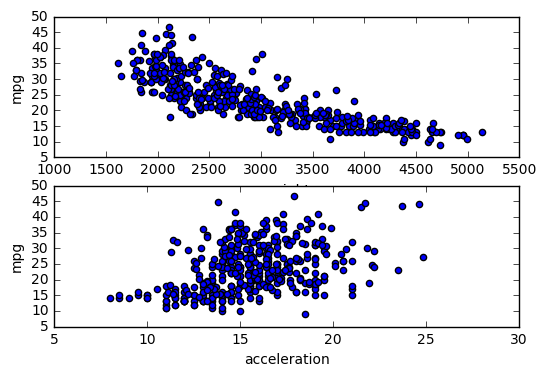

In [27]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
cars.plot('weight','mpg',kind='scatter',ax=ax1)
cars.plot('acceleration','mpg',kind='scatter',ax=ax2)
plt.show()

#### The above scatterplot shows a strong negative linear relationship between weight and mpg and a weak positive relationship between acceleration and mpg.

### Fitting the Regression Model
#### Let's try to quantify the relationship between weight and mpg using Linear Regression from scikit learn.

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(cars[["weight"]].values, cars["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Making Predictions
#### Now that we have trained the model on the data, we can use it to make predictions
#### Although predicting on the data taht it has been trained on is not how machine learning works but we need to know if the model captures the data effectively.

In [29]:
predictions=lr.predict(cars[["weight"]])

### Plotting The Model
#### We can now plot the actual fuel efficiency values for each car alongside the predicted fuel efficiency to gain visual understanding of the model's effectiveness.

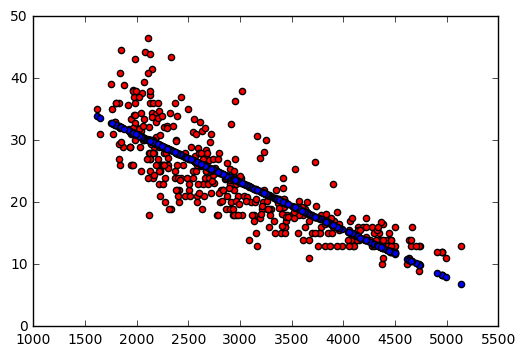

In [30]:
plt.scatter(cars['weight'],cars['mpg'],c="red")
plt.scatter(cars['weight'],predictions,c='blue')
plt.show()

### Error Metrics
#### To get a more quantitative understanding of the models accuracy, we need to find its error.
#### We will use Mean Squared Error from scikit-learn for this purpose.

In [31]:
from sklearn.metrics import mean_squared_error as mean_sq_err

mse=mean_sq_err(cars['mpg'],predictions)
print("Mean Squared Error =",mse)

Mean Squared Error = 18.7809397346


#### Root Mean Square Error (RMSE) does a better job of penalizing large error values.
#### While MSE value will be in Miles epr Gallon Squared, RMSE value will be in Miles per Gallon.

In [32]:
rmse = mse ** 0.5
print("Root Mean Squared Error = ", rmse)

Root Mean Squared Error =  4.33369815915


### Data Cleaning
#### Unlike weight, horsepower column has some missing values like '?'. We will filter out these rows so we can fit our model.

In [34]:
filtered_cars = cars[cars["horsepower"] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

C:\Users\Aditya Gogoi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Data Exploration
#### After cleaning the data, we can plot the correlation between horsepower and mpg. 

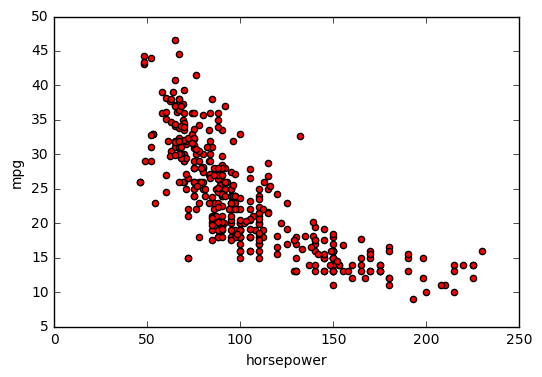

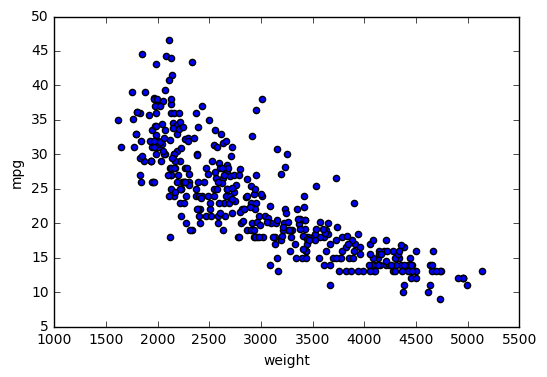

In [36]:
filtered_cars.plot('horsepower','mpg', kind='scatter',c='red')
filtered_cars.plot('weight','mpg', kind='scatter',c='blue')
plt.show()

### Fitting a Model
#### It's difficult to quantify the relationship between mpg and other attributes. 

In [38]:
lr = LinearRegression()
lr.fit(filtered_cars[['horsepower']],filtered_cars[['mpg']])
predictions = lr.predict(filtered_cars[['horsepower']])

### Plotting the Predictions
#### Lets plot the predictions vs. the actual values.

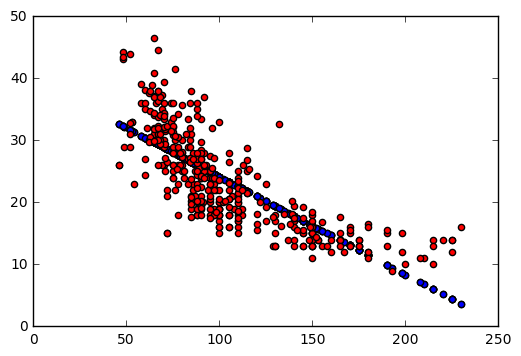

In [41]:
plt.scatter(filtered_cars['horsepower'],predictions,c='blue')
plt.scatter(filtered_cars['horsepower'],filtered_cars['mpg'],c='red')
plt.show()

### Error Metrics
#### Now we can calculate the error of our model's predictions

In [43]:
mse = mean_sq_err(predictions, filtered_cars['mpg'])
rmse = mse ** 0.5
print("Mean Square Error =",mse)
print("Root Mean Square Error =",rmse)

Mean Square Error = 23.9436629386
Root Mean Square Error = 4.89322623007


### Conclusions
#### Comparing both the MSE and RMSE for horsepower and weight, we can conclude that weight has a much better correlation with mpg.
#### So, if we have to use only one input to our model, we should definitely use weight.